In [13]:
import cv2  #to add watermarks (computer vision for image processing)
import numpy as np #mathematical computations
import requests #for downloading from url
from PIL import Image #used for opening and visualizing the images

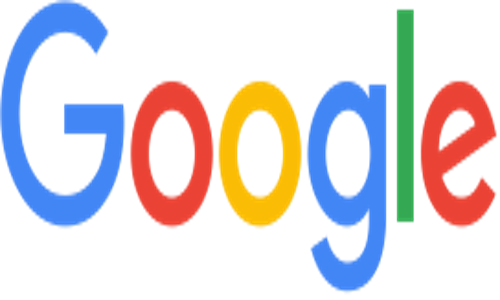

In [14]:
image = Image.open(requests.get('https://www.google.com/images/branding/googlelogo/1x/googlelogo_color_272x92dp.png',stream=True).raw) #requesting from the url
image_logow = image.resize((500,300))#creating 2 images for image and text watermarking 
image_textw = image.resize((500,300))#resized here because to visualize in the output of colab.
image_logow


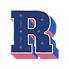

In [15]:
logo = Image.open(requests.get('https://static.wixstatic.com/media/c71a2f_029b32ebd85f43f9a7998212c2426797~mv2.png/v1/fill/w_69,h_69,al_c,usm_0.66_1.00_0.01,enc_auto/r.png',stream=True).raw)
logo# this is the watermark which will be layed on the above google image.

In [16]:
image_logow = np.array(image_logow.convert('RGB')) # storing into numpy array and converting the image(google) into RGB
h_image,w_image,_ = image_logow.shape # storing the height and weight but ignoring the channels "_" 
logo = np.array(logo.convert('RGB'))#same process with logo
h_logo,w_logo,_ = logo.shape


In [18]:
center_y = int(h_image/2)
center_x = int(w_image/2)# center of image
top_y = center_y - int(h_logo/2) # finding all four corners to place the logo (LOGIC as per code)
left_x = center_x - int(w_logo/2)
bottom_y = top_y + h_logo
right_x = left_x + w_logo

In [28]:
roi = image_logow[top_y: bottom_y,left_x: right_x] # region of interest (ROI) 
result = cv2.addWeighted(roi,1,logo,1,0) 
cv2.line(image_logow,(0,center_y),(left_x,center_y),(255,255,255),1) # I drew a line to check with the sides for visualizing. If needed we can draw lines using cv2
cv2.line(image_logow,(right_x,center_y),(w_image,center_y),(255,255,255),1)

image_logow[top_y:bottom_y,left_x: right_x]=result

result # numpy array will be printed.

array([[[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [251, 188,   5],
        [251, 188,   5],
        [251, 188,   5]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [251, 188,   5],
        [251, 188,   5],
        [251, 188,   5]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [251, 188,   5],
        [251, 188,   5],
        [251, 188,   5]],

       ...,

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [251, 188,   5],
        [251, 188,   5],
        [251, 188,   5]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [251, 188,   5],
        [251, 188,   5],
        [251, 188,   5]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [251, 188,   5],
        [251, 188,   5],
        [251, 188,   5]]

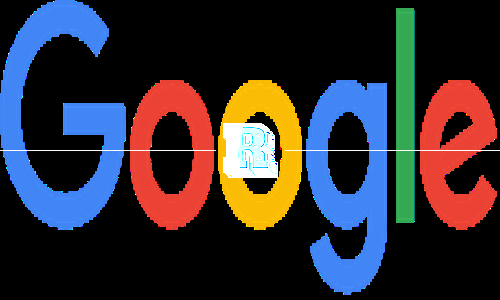

In [29]:
img = Image.fromarray(image_logow,'RGB')
img

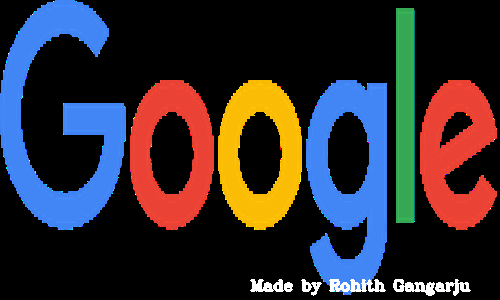

In [35]:
#plotting the text on the image
# simply adding the text to the same image using openCv functions
image_text = np.array(image_textw.convert('RGB'))
cv2.putText(image_text,text = 'Made by Rohith Gangarju',org=(w_image-250,h_image-10),fontFace = cv2.FONT_HERSHEY_COMPLEX,fontScale = 0.5, color=(255,255,255),thickness = 2,lineType=cv2.LINE_4)
t_img = Image.fromarray(image_text,'RGB')
t_img